In [ ]:
import tensorflow as tf
import os
import numpy as np
image_filename_dataset = tf.data.Dataset.list_files("images*.jpg", shuffle=False)
image_dataset = image_filename_dataset.map(lambda x: tf.io.decode_jpeg(tf.io.read_file(x)))

csv_data = []
for file in os.listdir(""):
    if ".csv" in file:
        csv_data.append("" + file)
csv_data.sort()

csv_data = tf.data.TextLineDataset(csv_data)

In [ ]:
import numpy
mean=numpy.array()

std=numpy.array()

def csv_preprocess(line):
    fields = tf.io.decode_csv(line, [float()] * )
    x = tf.stack(fields)
    x = (x[1:]-mean)/std
    return x

csv_dataset = csv_data.map(csv_preprocess)

In [ ]:
import cv2
from matplotlib import pyplot as plt

def image_preprocess(image):
    image = tf.image.resize(image, (256,256))
    #image = tf.image.rgb_to_grayscale(image)
    return image/255.

image_dataset = image_dataset.map(image_preprocess)

In [ ]:
ds = tf.data.Dataset.zip((image_dataset, csv_dataset))
ds = ds.batch(16).prefetch(1)

In [ ]:
DATASET_SIZE= 9997
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

full_dataset = ds
train_dataset = full_dataset.take(train_size)
test_dataset = full_dataset.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
DefaultMaxPooling2D = partial(keras.layers.MaxPooling2D,
                             pool_size=2, strides=(2,2))
yolo_model_pretrain = keras.models.Sequential([
    DefaultConv2D(filters=16, kernel_size=3, input_shape=[224,224,3]),
    DefaultMaxPooling2D(),
    DefaultConv2D(filters=32),
    DefaultMaxPooling2D(),
    DefaultConv2D(filters=64),
    DefaultMaxPooling2d(),
    
])

In [ ]:
import os

model = tf.keras.applications.MobileNetV2(weights=None, input_shape=(256,256,3), classes=6)

opt = tf.keras.optimizers.Nadam(learning_rate=3e-4)

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir(model_name):
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") + " " + model_name
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir("MobileNetV2")
callback = [tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', patience=7), tf.keras.callbacks.TensorBoard(run_logdir)]
model.summary()

In [ ]:
model.compile(loss="Huber", optimizer=opt, metrics=['mse', 'mae', 'mape', 'accuracy'])
history = model.fit(train_dataset, batch_size=16, epochs=100, callbacks=[callback],
                    validation_data=(val_dataset))

In [31]:
import os

def find_jpg(file_name):
    path1 = '/home/jack/opencv-haar-classifier-training/' + file_name + '/'
    data = os.listdir(path1)
    new_data = []
    
    for img_name in data:
        if '.jpg' in img_name:
            img_name = path1 + img_name
            new_data.append(img_name)
    
    new_data.sort()
    return new_data
files = find_jpg('FreightFrenzyImages/DuckImages')

()

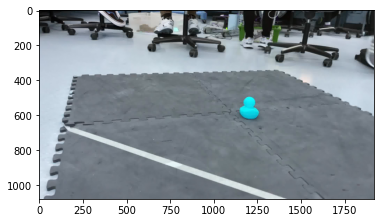

In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

cube_cascade = cv2.CascadeClassifier('/home/jack/opencv-haar-classifier-training/CubeClassifier/cascade.xml')

def haar_values(file):
    img = cv2.imread(file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    cubes = cube_cascade.detectMultiScale(img, 1.3, 23)
    for (x,y,w,h) in cubes:
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        #roi_gray = gray[y:y+h, x:x+w]
        #roi_color = img[y:y+h, x:x+w]'
    plt.imshow(img)
    plt.show
    
    return cubes

haar_values(files[69])

In [25]:
files

['/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-001.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-002.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-003.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-004.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-005.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-006.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-007.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-008.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-009.jpg',
 '/home/jack/opencv-haar-classifier-training/FreightFrenzyImages/CubeImages/cube_out-010.jpg',
 '/home/jack/opencv-haar-classifier-training/Freig